In [2]:
from voc_data_loader import image_loader, voc_meta
%matplotlib inline

import matplotlib
import numpy
import matplotlib.pyplot as plt

In [3]:
loader = image_loader("./")
meta = voc_meta("./")

In [4]:
batch_size = 4
data, labels, boxes = loader.get_next_train_batch(batch_size)

This is the data image shape

In [6]:
print data.shape

(4, 512, 512, 3)


Here is what the bounding boxes look like

In [7]:
print boxes

[[[ 144.  173.  190.  226.]
  [ 199.  188.  236.  256.]
  [ 221.  159.  277.  212.]
  [ 257.  162.  298.  206.]
  [ 295.  194.  336.  238.]
  [ 317.  203.  358.  240.]
  [ 342.  201.  388.  238.]
  [ 371.  195.  405.  227.]
  [ 387.  192.  420.  226.]
  [   0.    0.    0.    0.]]

 [[ 207.  256.  281.  334.]
  [ 192.  342.  425.  436.]
  [   2.  334.  200.  436.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]]

 [[  60.  154.  361.  442.]
  [ 110.   67.  298.  355.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]]

 [[  57.  295.  253.  511.]
  [  62.   14.  474.  511.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.

And lastly, here are the labels (one-hot format):

In [8]:
print labels

[[[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]]

 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0

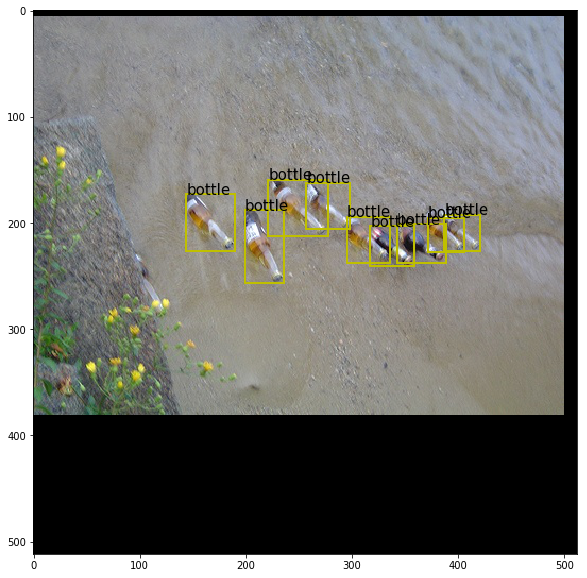

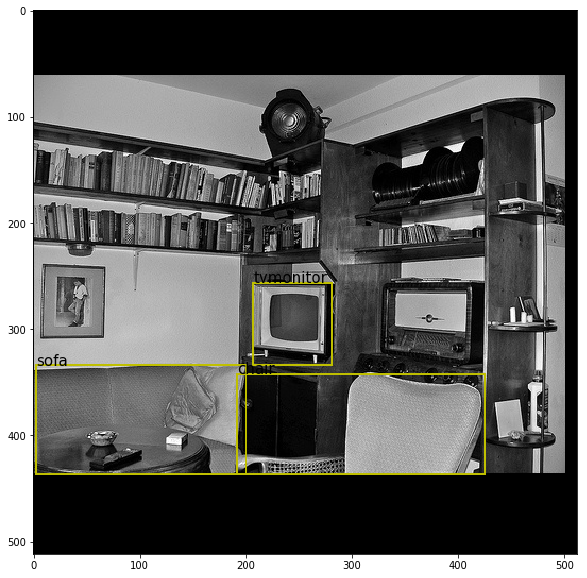

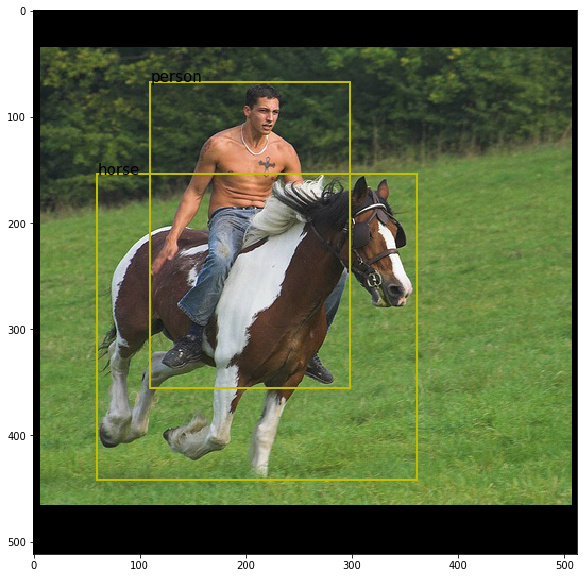

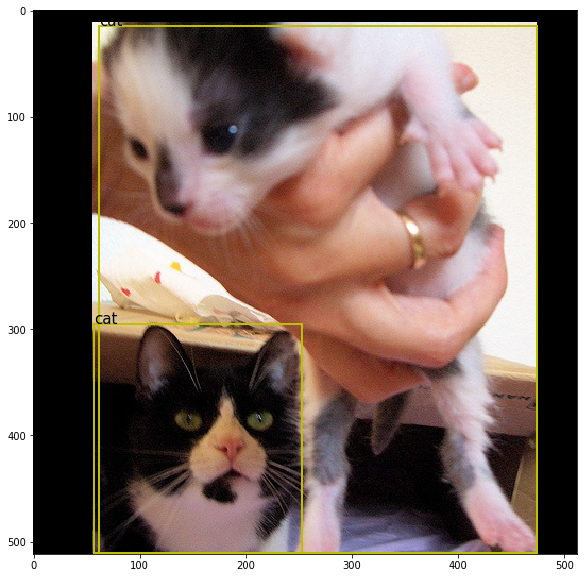

In [10]:
for i in range(batch_size):
    n_roi = int(numpy.sum(labels[i]))
    fig,ax = plt.subplots(figsize=(10,10))
    plt.imshow(data[i])
    for box, label in zip(boxes[i, 0:n_roi], labels[i, 0:n_roi]):
        class_name = meta.class_name(numpy.argmax(label))
        rect = matplotlib.patches.Rectangle((box[0],box[1]),
                                            box[2] - box[0],
                                            box[3] - box[1],
                                            linewidth=2,
                                            edgecolor='y',
                                            facecolor='none')
        ax.text(box[0], box[1],class_name, fontsize=15)
        ax.add_patch(rect)
    plt.show()
